In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [3]:
os.chdir('C:\\Users\\tommc\\OneDrive\\Documents\\GitHub\\Baseball')
os.listdir()

['366_800020_bundle_archive', 'clean_data.xlsx', 'final_clean_data.xlsx']

In [169]:
data = pd.read_excel('final_clean_data.xlsx')

In [170]:
data

,Unnamed: 0,playerID,yearID,AB,H,2B,3B,HR,SO,BB,total_hits,BA,birthYear,age,last year BA,Last season league avg,career_BA,last_3_seasons_BA,last_3_seaon %change_from_career_BA,last_season_%change_from_career_BA
0,0,mayswi01,1970,403,114,17,3,13,71,49,147,0.384937,1931,39,0.364764,0.306357,0.364764,0.364764,0.000000,0.000000
1,1,aaronha01,1970,547,164,30,3,44,47,87,241,0.424419,1934,36,0.440585,0.306357,0.402675,0.402675,0.000000,0.094146
2,2,bankser01,1970,565,143,19,2,23,101,42,187,0.342342,1931,39,0.330973,0.306357,0.378774,0.378774,0.000000,-0.126199
3,3,kalinal01,1970,456,124,17,0,21,61,54,162,0.372591,1934,36,0.355263,0.306357,0.372896,0.375607,0.007269,-0.047287
4,4,boyercl02,1970,496,124,16,1,14,87,55,155,0.311579,1937,33,0.312500,0.306357,0.360817,0.332912,-0.077338,-0.133910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19848,19848,vogtst01,2014,135,34,6,1,4,28,9,45,0.356877,1984,30,0.333333,0.315568,0.324950,0.315278,-0.029765,0.025799
19849,19849,wongko01,2014,59,9,1,0,0,12,3,10,0.320896,1990,24,0.169492,0.315568,0.321988,0.267608,-0.168887,-0.473609
19850,19850,yelicch01,2014,240,69,12,1,4,66,31,86,0.360825,1991,23,0.358333,0.315568,0.323558,0.287053,-0.112823,0.107479
19851,19851,zuninmi01,2014,173,37,5,0,5,49,16,47,0.299087,1991,23,0.271676,0.315568,0.322340,0.266500,-0.173232,-0.157175


In [171]:
data.columns

Index(['Unnamed: 0', 'playerID', 'yearID', 'AB', 'H', '2B', '3B', 'HR', 'SO',
       'BB', 'total_hits', 'BA', 'birthYear', 'age', 'last year BA',
       'Last season league avg', 'career_BA', 'last_3_seasons_BA',
       'last_3_seaon %change_from_career_BA',
       'last_season_%change_from_career_BA'],
      dtype='object')

In [172]:
data = data.drop('Unnamed: 0',axis=1)

In [173]:
data

,playerID,yearID,AB,H,2B,3B,HR,SO,BB,total_hits,BA,birthYear,age,last year BA,Last season league avg,career_BA,last_3_seasons_BA,last_3_seaon %change_from_career_BA,last_season_%change_from_career_BA
0,mayswi01,1970,403,114,17,3,13,71,49,147,0.384937,1931,39,0.364764,0.306357,0.364764,0.364764,0.000000,0.000000
1,aaronha01,1970,547,164,30,3,44,47,87,241,0.424419,1934,36,0.440585,0.306357,0.402675,0.402675,0.000000,0.094146
2,bankser01,1970,565,143,19,2,23,101,42,187,0.342342,1931,39,0.330973,0.306357,0.378774,0.378774,0.000000,-0.126199
3,kalinal01,1970,456,124,17,0,21,61,54,162,0.372591,1934,36,0.355263,0.306357,0.372896,0.375607,0.007269,-0.047287
4,boyercl02,1970,496,124,16,1,14,87,55,155,0.311579,1937,33,0.312500,0.306357,0.360817,0.332912,-0.077338,-0.133910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19848,vogtst01,2014,135,34,6,1,4,28,9,45,0.356877,1984,30,0.333333,0.315568,0.324950,0.315278,-0.029765,0.025799
19849,wongko01,2014,59,9,1,0,0,12,3,10,0.320896,1990,24,0.169492,0.315568,0.321988,0.267608,-0.168887,-0.473609
19850,yelicch01,2014,240,69,12,1,4,66,31,86,0.360825,1991,23,0.358333,0.315568,0.323558,0.287053,-0.112823,0.107479
19851,zuninmi01,2014,173,37,5,0,5,49,16,47,0.299087,1991,23,0.271676,0.315568,0.322340,0.266500,-0.173232,-0.157175


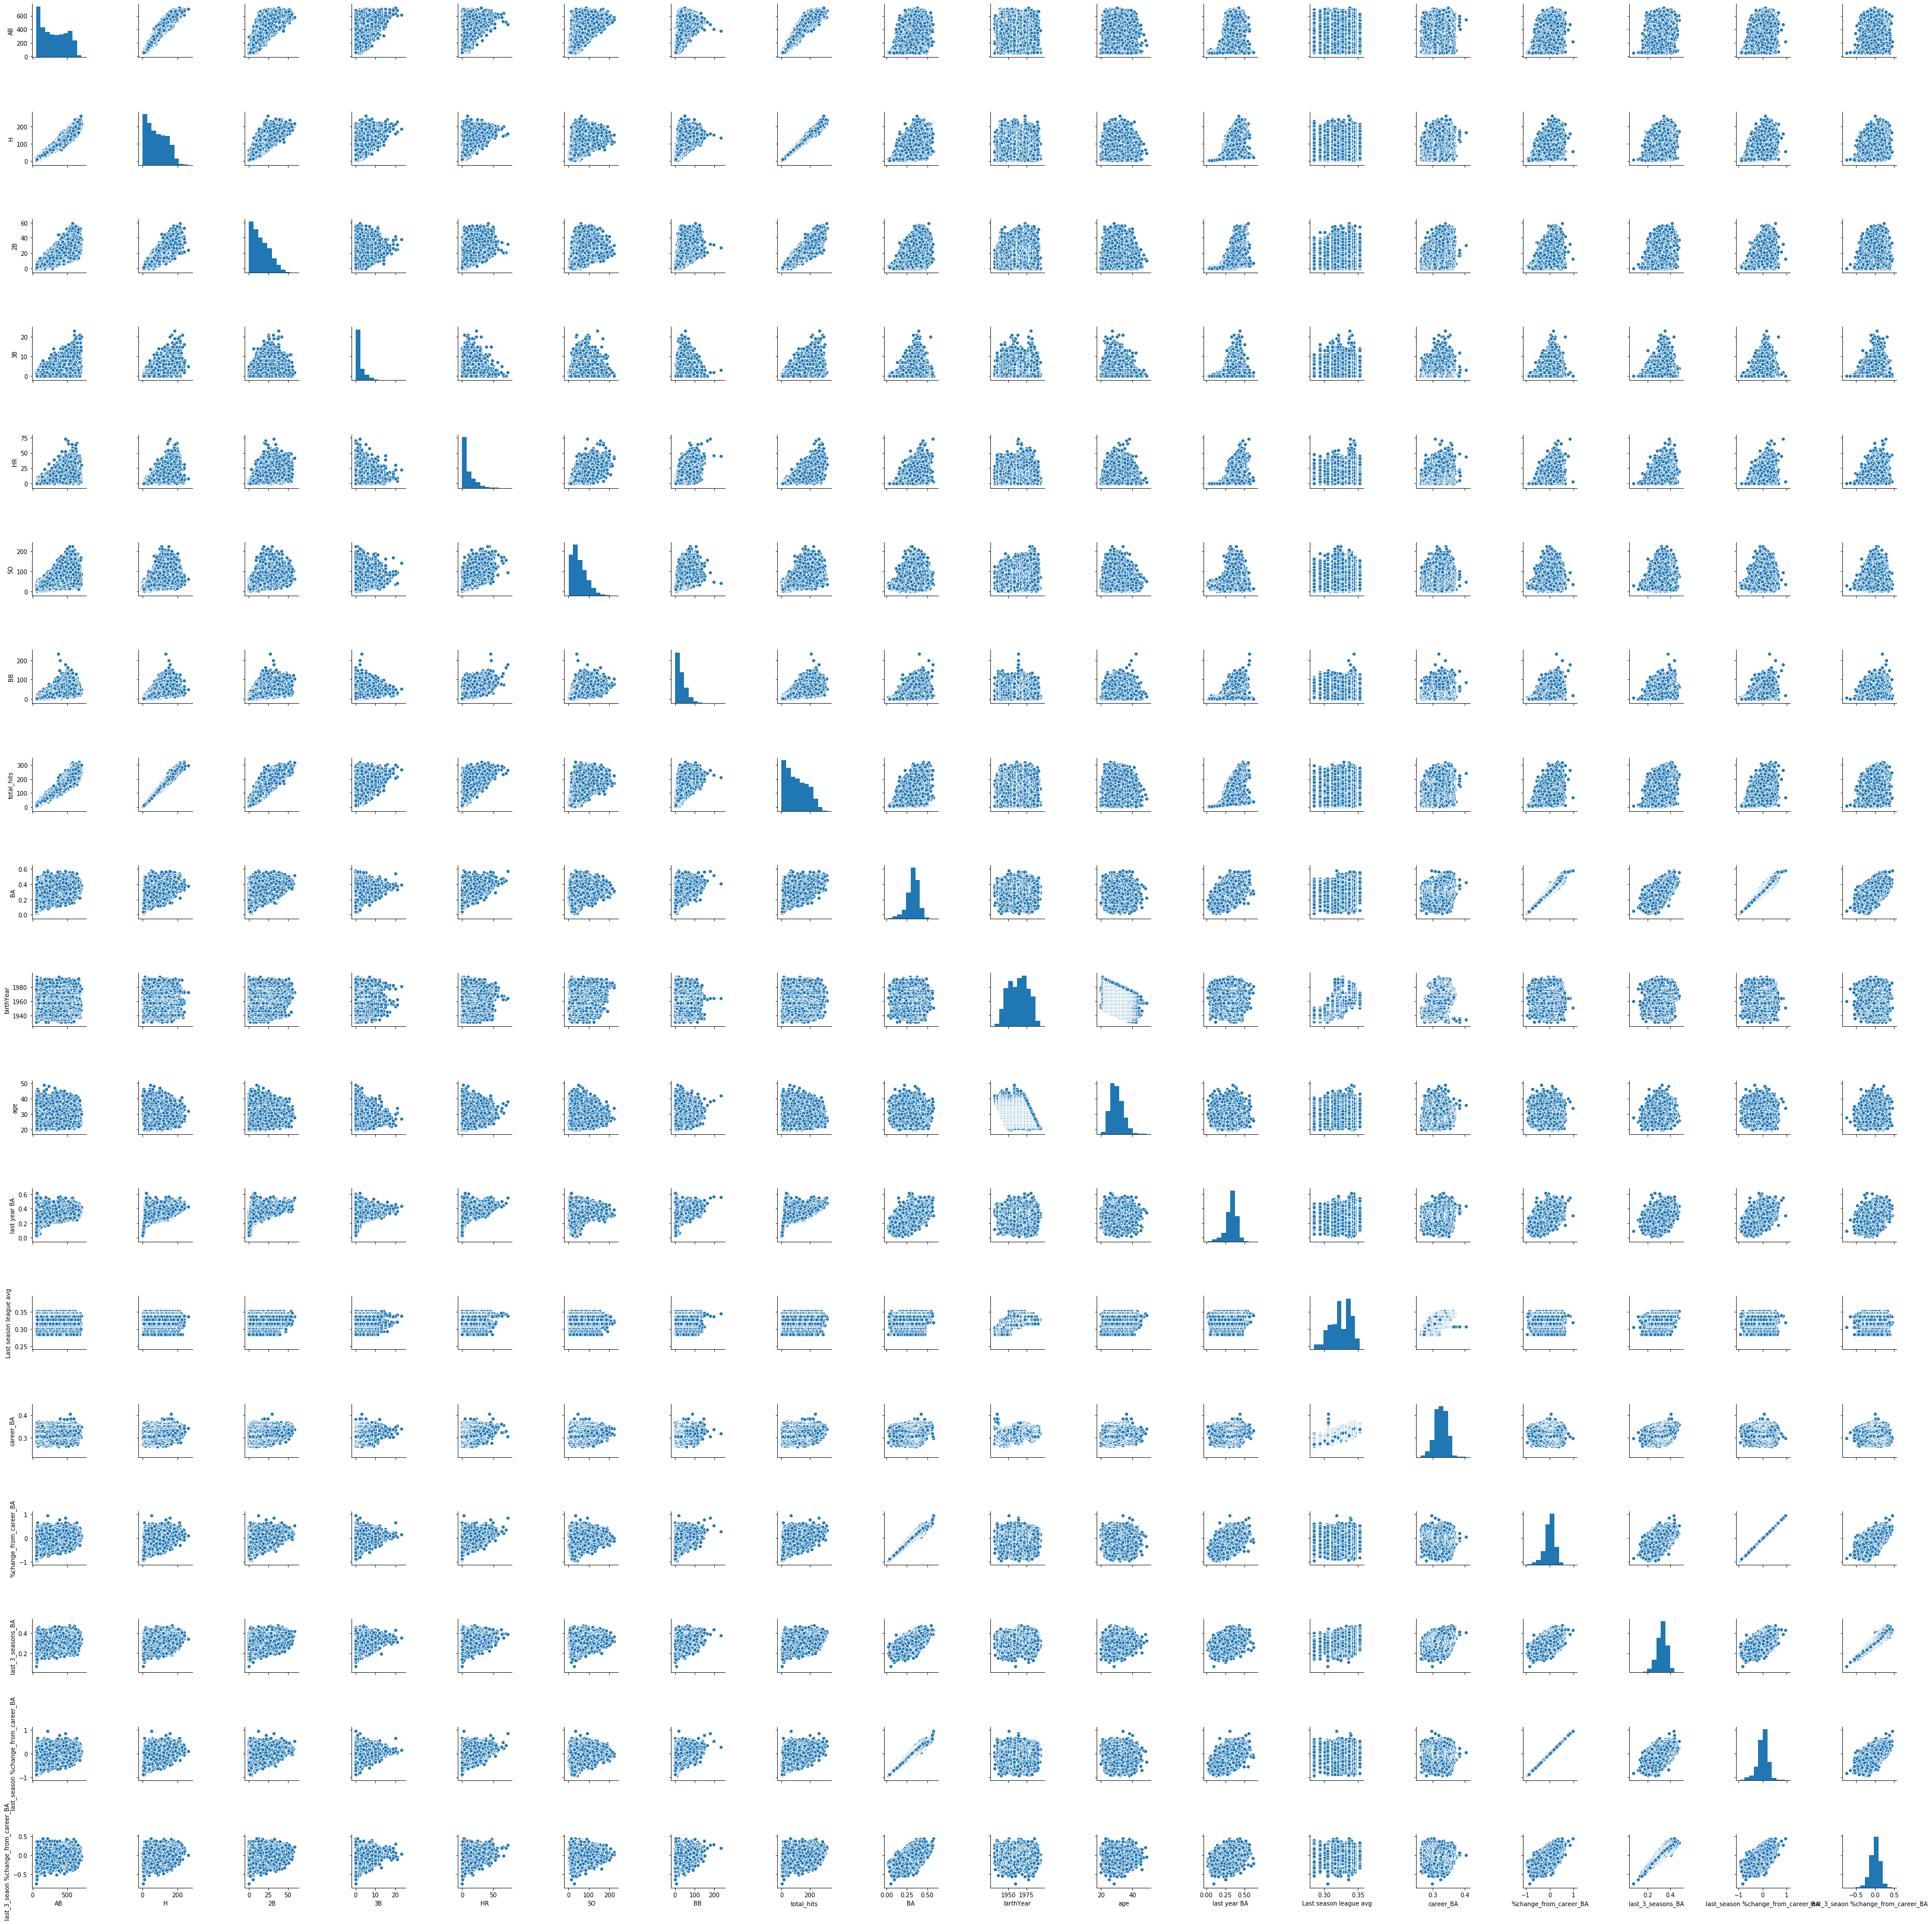

In [15]:
sns.pairplot(data.drop(['playerID','yearID'],axis=1))

In [174]:
X = data.drop(['playerID','BA','yearID','birthYear','Last season league avg'],axis=1)
y = data.BA
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=1)

In [176]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [272]:
print(y_train)

6294     0.374291
12943    0.314711
10128    0.307692
758      0.312195
1868     0.258929
           ...   
10955    0.351145
17289    0.327103
5192     0.310811
12172    0.301587
235      0.292135
Name: BA, Length: 14889, dtype: float64


In [177]:
y_pred = model.predict(X_test)

In [178]:
explained_variance_score(y_test,y_pred)

0.350364689535937

In [179]:
mean_absolute_error(y_test,y_pred)

0.043078752879043836

In [180]:
lm.intercept_

0.324819958643167

In [181]:
df_model = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'],)

In [182]:
df_model.sort_values(by='Coefficient',ascending=False)

,Coefficient
AB,0.037026
last_season_%change_from_career_BA,0.022776
H,0.018954
career_BA,0.014286
total_hits,0.012632
HR,0.011028
SO,0.010469
last year BA,0.010010
age,0.007353
BB,0.005709


In [183]:
X_train2 = data[data['yearID']<=2005]

In [184]:
y_train2 = X_train2['BA']

In [185]:
X_train2 = X_train2.drop(['playerID','BA','yearID','Last season league avg','birthYear'],axis =1)

In [186]:
X_train2

,AB,H,2B,3B,HR,SO,BB,total_hits,age,last year BA,career_BA,last_3_seasons_BA,last_3_seaon %change_from_career_BA,last_season_%change_from_career_BA
0,403,114,17,3,13,71,49,147,39,0.364764,0.364764,0.364764,0.000000,0.000000
1,547,164,30,3,44,47,87,241,36,0.440585,0.402675,0.402675,0.000000,0.094146
2,565,143,19,2,23,101,42,187,39,0.330973,0.378774,0.378774,0.000000,-0.126199
3,456,124,17,0,21,61,54,162,36,0.355263,0.372896,0.375607,0.007269,-0.047287
4,496,124,16,1,14,87,55,155,33,0.312500,0.360817,0.332912,-0.077338,-0.133910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15082,55,13,2,0,0,13,4,15,29,0.272727,0.312858,0.321285,0.026934,-0.128272
15083,70,15,2,1,0,26,1,18,29,0.257143,0.312449,0.299284,-0.042134,-0.177009
15084,290,76,11,3,16,85,30,106,26,0.365517,0.312534,0.298462,-0.045023,0.169529
15085,263,77,17,1,14,40,14,109,23,0.414449,0.313203,0.345703,0.103767,0.323259


In [187]:
X_train2.columns

Index(['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB', 'total_hits', 'age',
       'last year BA', 'career_BA', 'last_3_seasons_BA',
       'last_3_seaon %change_from_career_BA',
       'last_season_%change_from_career_BA'],
      dtype='object')

In [188]:
y_train2

0        0.384937
1        0.424419
2        0.342342
3        0.372591
4        0.311579
           ...   
15082    0.261194
15083    0.257143
15084    0.326409
15085    0.427826
15086    0.379747
Name: BA, Length: 15087, dtype: float64

In [189]:
X_test2 = data[data['yearID']>2005]

In [190]:
y_test2 = X_test2['BA']

In [191]:
X_test2 = X_test2.drop(['playerID','BA','yearID','Last season league avg','birthYear'],axis =1)

In [192]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 15087 to 19852
Data columns (total 14 columns):
AB                                     4766 non-null int64
H                                      4766 non-null int64
2B                                     4766 non-null int64
3B                                     4766 non-null int64
HR                                     4766 non-null int64
SO                                     4766 non-null int64
BB                                     4766 non-null int64
total_hits                             4766 non-null int64
age                                    4766 non-null int64
last year BA                           4766 non-null float64
career_BA                              4766 non-null float64
last_3_seasons_BA                      4766 non-null float64
last_3_seaon %change_from_career_BA    4766 non-null float64
last_season_%change_from_career_BA     4766 non-null float64
dtypes: float64(5), int64(9)
memory usage: 558.5 KB


In [193]:
X_test2

,AB,H,2B,3B,HR,SO,BB,total_hits,age,last year BA,career_BA,last_3_seasons_BA,last_3_seaon %change_from_career_BA,last_season_%change_from_career_BA
15087,233,64,12,1,9,57,27,86,48,0.369099,0.311717,0.376567,0.208041,0.184082
15088,373,135,27,3,45,41,232,210,42,0.563003,0.315046,0.426085,0.352455,0.787051
15089,590,156,40,1,26,90,37,223,41,0.377966,0.319783,0.436689,0.365581,0.181947
15090,64,13,0,0,0,13,2,13,40,0.203125,0.318889,0.381365,0.195917,-0.363022
15091,584,170,27,0,34,76,78,231,38,0.395548,0.321196,0.325546,0.013546,0.231486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19848,135,34,6,1,4,28,9,45,30,0.333333,0.324950,0.315278,-0.029765,0.025799
19849,59,9,1,0,0,12,3,10,24,0.169492,0.321988,0.267608,-0.168887,-0.473609
19850,240,69,12,1,4,66,31,86,23,0.358333,0.323558,0.287053,-0.112823,0.107479
19851,173,37,5,0,5,49,16,47,23,0.271676,0.322340,0.266500,-0.173232,-0.157175


In [194]:
y_test2

15087    0.345455
15088    0.403270
15089    0.344891
15090    0.188679
15091    0.370861
           ...   
19848    0.356877
19849    0.320896
19850    0.360825
19851    0.299087
19852    0.313364
Name: BA, Length: 4766, dtype: float64

In [195]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train2,y_train2)

In [196]:
y_pred2 = model2.predict(X_test2)

In [197]:
explained_variance_score(y_test2,y_pred2)

0.33897489358443467

In [198]:
mean_absolute_error(y_test2,y_pred2)

0.04332312827083043

In [199]:
lm2.intercept_

0.09521422315330474

In [200]:
df_model2 = pd.DataFrame(abs(lm2.coef_), X.columns, columns=['Coefficient'],)

In [201]:
df_model2.sort_values(by='Coefficient',ascending=False)

,Coefficient
career_BA,0.743927
last_season_%change_from_career_BA,0.161803
last_3_seasons_BA,0.087720
last year BA,0.038949
last_3_seaon %change_from_career_BA,0.023446
age,0.001609
HR,0.000854
H,0.000670
SO,0.000291
BB,0.000215


In [248]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators = 100,random_state=1)

In [261]:
X_train3,X_test3,y_train3,y_test3 = X_train,X_test,y_train,y_test

In [262]:
RFmodel.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [263]:
y_pred3 = RFmodel.predict(X_test3)

In [264]:
explained_variance_score(y_test3,y_pred3)

0.35925876372068877

In [265]:
mean_absolute_error(y_test3,y_pred3)

0.042633156451498996

In [254]:
RFmodel2 = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=1)

In [266]:
RFmodel2.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [267]:
y_predRF = RFmodel2.predict(X_test3)

In [268]:
explained_variance_score(y_test3,y_predRF)

0.37525388958729033

In [269]:
mean_absolute_error(y_test3,y_predRF)

0.04214540553763126

In [270]:
RFmodel2.feature_importances_

array([4.90516653e-03, 2.58419578e-03, 1.39510177e-03, 3.21629839e-04,
       1.32001560e-01, 3.51931338e-02, 4.03492302e-02, 5.89533572e-02,
       2.19938194e-03, 6.69678766e-01, 9.79721902e-03, 3.08203886e-03,
       1.66767065e-03, 3.78715485e-02])

In [271]:
RFmodel.feature_importances_

array([0.04001021, 0.032453  , 0.0316807 , 0.01873215, 0.0793554 ,
       0.06663069, 0.06436765, 0.05216446, 0.04461408, 0.33253407,
       0.06573081, 0.05347018, 0.04987354, 0.06838307])

In [273]:
from sklearn.model_selection import GridSearchCV

In [276]:
max_depth = [5,10,20]
min_sample_leaf = [5,50]

In [284]:
param_grid = {'max_depth': max_depth,'min_samples_leaf': min_sample_leaf}

In [285]:
print(X_train)
print(y_train)

[[ 1.68248966  1.46692098  1.24601159 ... -0.14702168 -0.00337094
   0.53976056]
 [ 1.25636392  1.79835192  0.16835109 ...  0.56970697 -0.04670658
   0.26431238]
 [-1.10371711 -1.14770095 -0.63989428 ... -0.03950604 -0.66793004
  -1.01249564]
 ...
 [ 1.78628952  1.76152626  0.6173763  ...  0.11612889 -0.17693334
  -0.30286517]
 [-0.53008631 -0.66896735 -0.72969932 ... -0.58664162 -0.60228638
  -0.91616738]
 [ 0.15827066 -0.06134395 -0.63989428 ... -2.21208444 -1.61716068
  -0.3107917 ]]
6294     0.374291
12943    0.314711
10128    0.307692
758      0.312195
1868     0.258929
           ...   
10955    0.351145
17289    0.327103
5192     0.310811
12172    0.301587
235      0.292135
Name: BA, Length: 14889, dtype: float64


In [300]:
RFmodel3 = RandomForestRegressor(n_estimators=100,criterion='mae')
RFmodel_cv = GridSearchCV(RFmodel3,param_grid,cv=5)

In [301]:
print(param_grid)

{'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 50]}


In [ ]:
RFmodel_cv.fit(X_train,y_train)

In [292]:
print("Best Score:" + str(RFmodel_cv.best_score_))
print("Best Parameters: " + str(RFmodel_cv.best_params_))

Best Score:0.40932050652580115
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5}


In [293]:
RFfinal = RandomForestRegressor(n_estimators=1000,max_depth=10,min_samples_leaf=5,criterion=,'mae')

In [294]:
RFfinal.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [295]:
y_predfinal = RFfinal.predict(X_test)

In [296]:
explained_variance_score(y_test,y_predfinal)

0.37904776970924614

In [297]:
mean_absolute_error(y_test,y_predfinal)

0.0419106776169535

In [298]:
important_features = pd.Series(data=RFfinal.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [299]:
important_features

last year BA                           0.526794
HR                                     0.116239
total_hits                             0.053820
BB                                     0.049745
SO                                     0.048604
last_season_%change_from_career_BA     0.040941
career_BA                              0.040446
age                                    0.026160
last_3_seasons_BA                      0.023883
last_3_seaon %change_from_career_BA    0.020912
AB                                     0.020626
H                                      0.014309
2B                                     0.012271
3B                                     0.005251
dtype: float64